In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\macie\OneDrive\Dokumenty\GitHub\ExpeRespo\Model_I_SImulation\Metrics\Server_Metrics.csv"
server_metrics = pd.read_csv(path, names=['Accuracy'], index_col=0)

<AxesSubplot:title={'center':'Central Model Accuracy'}, xlabel='Central Model Accuracy', ylabel='Accuracy'>

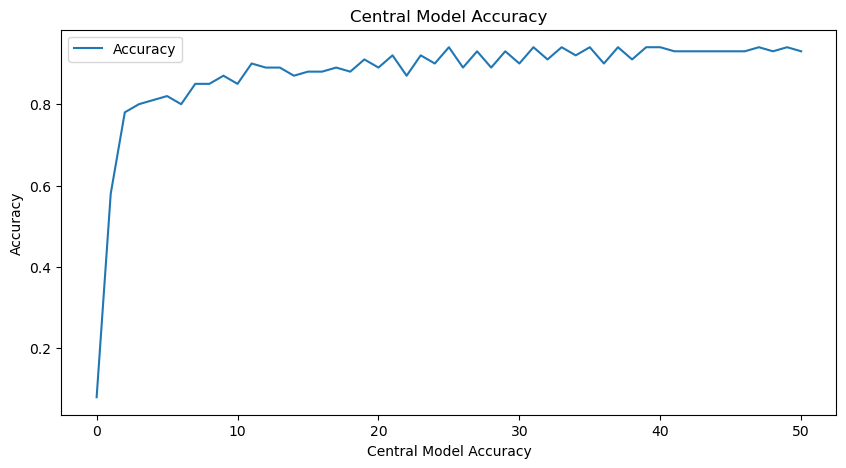

In [3]:
server_metrics.plot(xlabel='Central Model Accuracy', ylabel='Accuracy', title="Central Model Accuracy", figsize=(10, 5))

In [4]:
path = r"C:\Users\macie\OneDrive\Dokumenty\GitHub\ExpeRespo\Model_I_SImulation\Metrics\Aggregated_Metrics.csv"
columns = []
for i in range(5):
    columns.append("I{} Accuracy".format((i+1)))
for i in range(5):
    columns.append("I{} Number of examples".format((i+1)))
client_metrics = pd.read_csv(path, index_col=0, names=columns)

In [5]:
client_metrics.head()

,I1 Accuracy,I2 Accuracy,I3 Accuracy,I4 Accuracy,I5 Accuracy,I1 Number of examples,I2 Number of examples,I3 Number of examples,I4 Number of examples,I5 Number of examples
1,0.63,0.59,0.63,0.77,0.71,100,100,100,100,100
2,0.79,0.81,0.90,0.75,0.82,100,100,100,100,100
3,0.82,0.95,0.81,0.77,0.77,100,100,100,100,100
4,0.76,0.81,0.96,0.78,0.87,100,100,100,100,100
5,0.73,0.93,0.82,1.00,0.90,100,100,100,100,100


<AxesSubplot:title={'center':'Instances Accuracy'}, xlabel='Training Round', ylabel='Accuracy'>

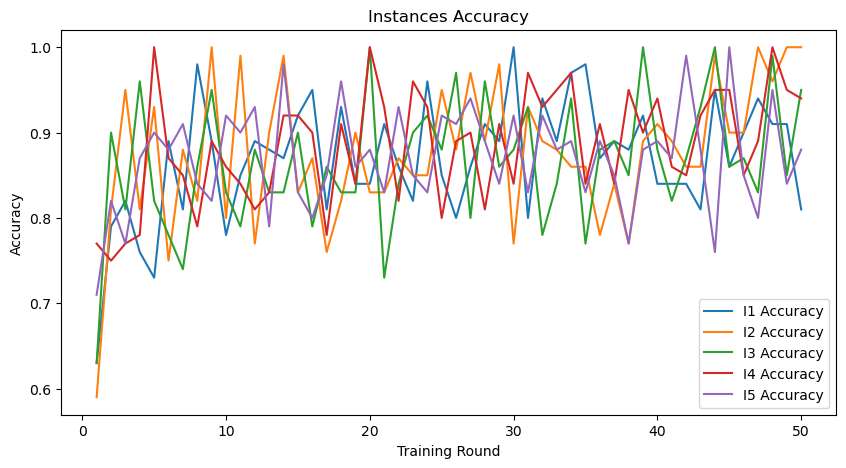

In [6]:
client_metrics.iloc[:, 0:5].plot(xlabel='Training Round', ylabel='Accuracy', title="Instances Accuracy", figsize=(10, 5))

Text(0.5, 1.0, 'Instances Utility against time in training')

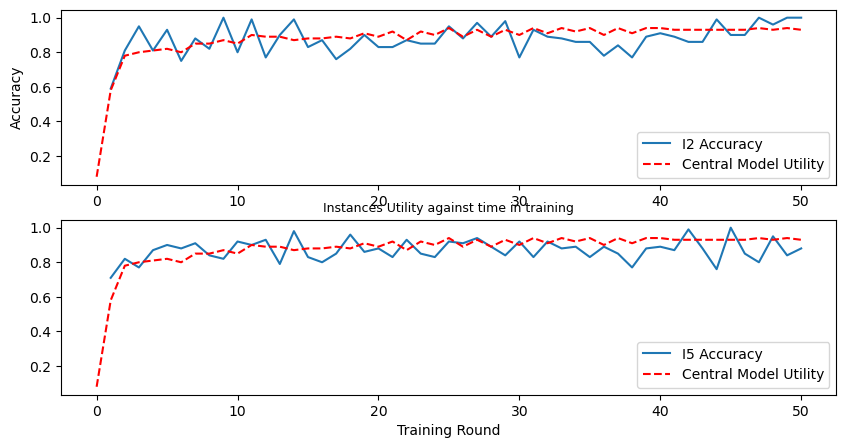

In [7]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(211)

ax1.plot(client_metrics["I2 Accuracy"], label='I2 Accuracy')
ax1.plot(server_metrics, "r--", label='Central Model Utility')
ax1.set_ylabel("Accuracy")
ax1.legend()


ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
ax2.plot(client_metrics["I5 Accuracy"], label='I5 Accuracy')
ax2.plot(server_metrics, "r--", label="Central Model Utility")
ax2.set_xlabel("Training Round")
ax2.legend()
ax2.set_title("Instances Utility against time in training", fontsize=9)

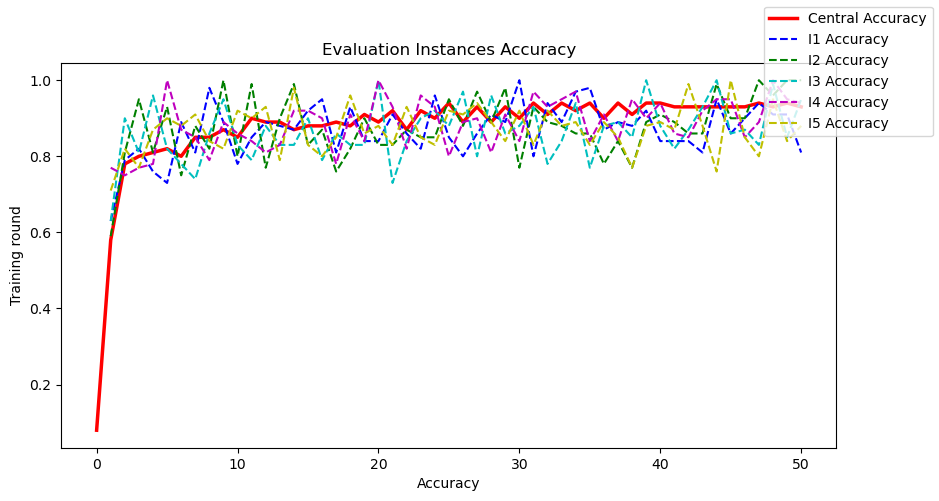

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.set_ylabel("Training round")
ax.set_xlabel("Accuracy")
ax.plot(server_metrics, "r-", label='Central Accuracy', linewidth=2.5)
ax.plot(client_metrics['I1 Accuracy'], 'b--', label='I1 Accuracy')
ax.plot(client_metrics['I2 Accuracy'], 'g--', label='I2 Accuracy')
ax.plot(client_metrics['I3 Accuracy'], 'c--', label='I3 Accuracy')
ax.plot(client_metrics['I4 Accuracy'], 'm--', label='I4 Accuracy')
ax.plot(client_metrics['I5 Accuracy'], 'y--', label='I5 Accuracy')
ax.set_title("Evaluation Instances Accuracy")

fig.legend()

C:\Users\macie\AppData\Local\Temp\ipykernel_14236\1402309753.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


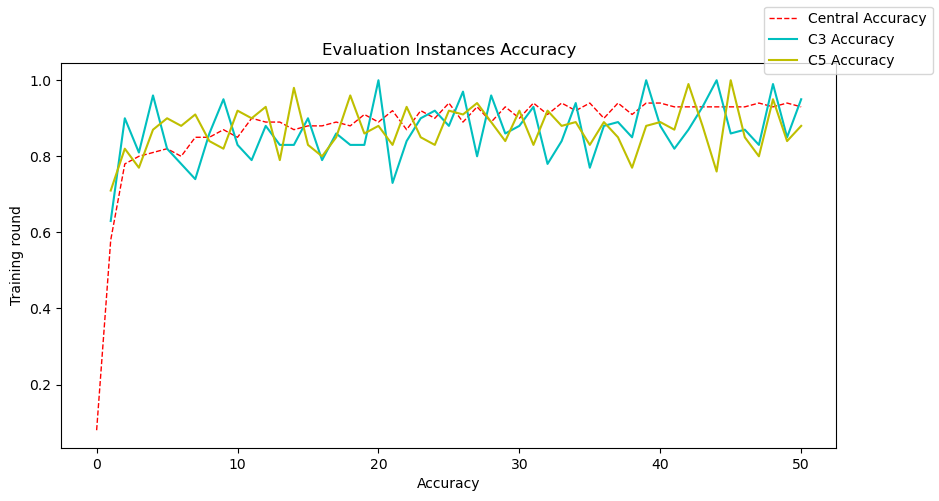

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.set_ylabel("Training round")
ax.set_xlabel("Accuracy")
ax.plot(server_metrics, "r--", label='Central Accuracy', linewidth=1)
ax.plot(client_metrics['I3 Accuracy'], 'c-', label='C3 Accuracy')
ax.plot(client_metrics['I5 Accuracy'], 'y-', label='C5 Accuracy')
ax.set_title("Evaluation Instances Accuracy")

fig.show()
fig.legend()

In [10]:
path = r"C:\Users\macie\OneDrive\Dokumenty\GitHub\ExpeRespo\Model_I_SImulation\Metrics\Aggregated_Evaluation.csv"
columns = ["Training Round", "Client ID", "Accuracy"]
evaluation_metrics = pd.read_csv(path, names=columns)
evaluation_metrics

,Training Round,Client ID,Accuracy
0,1,32,0.63
1,1,7,0.59
2,1,23,0.63
3,1,94,0.77
4,1,52,0.71
...,...,...,...
245,50,21,0.81
246,50,88,1.00
247,50,82,0.95
248,50,76,0.94


Text(0.5, 1.0, 'Number of participations for particular clients')

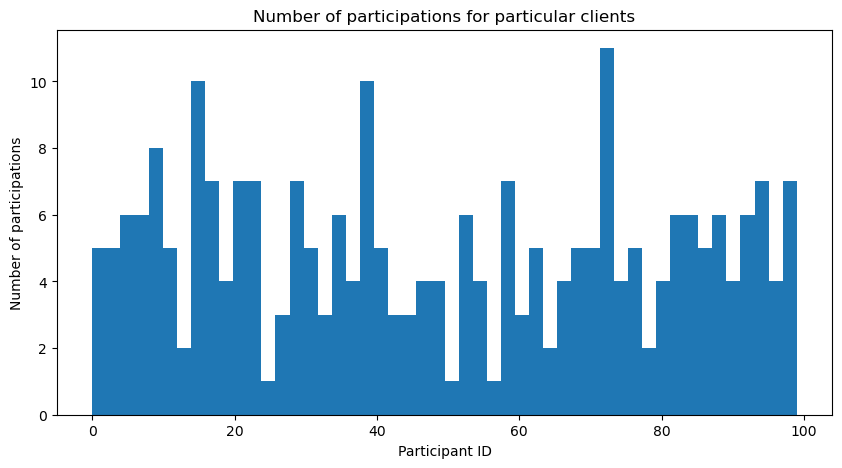

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(evaluation_metrics['Client ID'], bins=50)
ax.set_ylabel("Number of participations")
ax.set_xlabel("Participant ID")
ax.set_title("Number of participations for particular clients")

<AxesSubplot:ylabel='Density'>

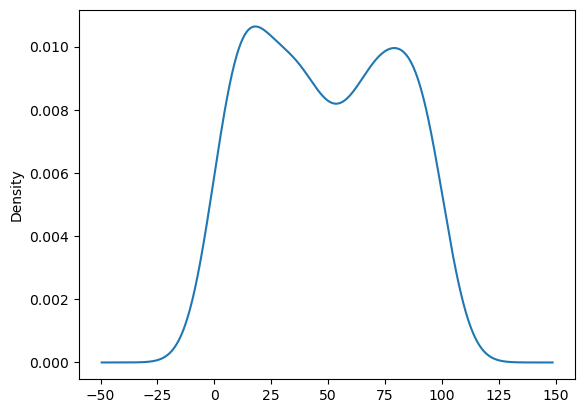

In [12]:
evaluation_metrics["Client ID"].plot.density()

In [13]:
ids = evaluation_metrics["Client ID"].value_counts()
ids = ids[ids > 4]
ids_search = list(ids.index)

selected_evaluation = evaluation_metrics[evaluation_metrics["Client ID"].isin(ids_search)]

clients = {}
for i in ids_search:
    results = list(selected_evaluation[selected_evaluation["Client ID"] == i]['Accuracy'])
    clients[i] = results
    
clients_r = {}
for i in ids_search:
    results = selected_evaluation[selected_evaluation["Client ID"] == i]
    clients_r[i] = list(results["Training Round"]), list(results["Accuracy"])

Text(0.5, 1.0, 'Local Model Utility against time in training')

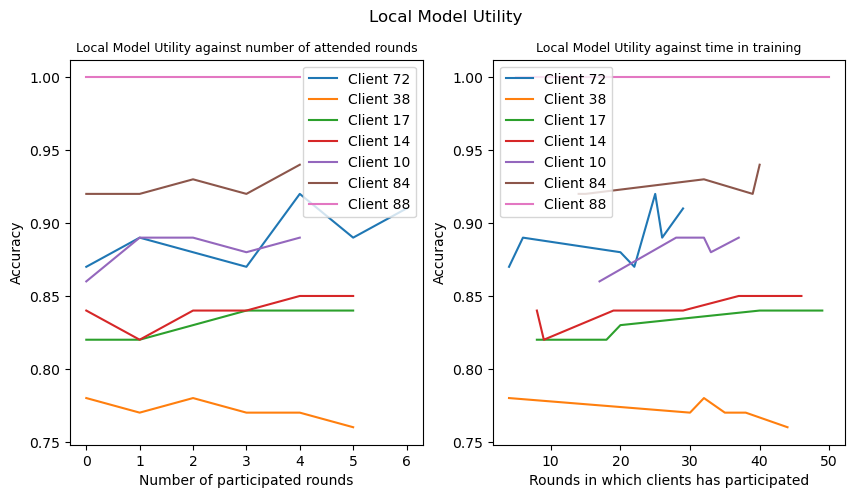

In [14]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Local Model Utility')

ax = fig.add_subplot(121)
for c in clients.keys():
    ax.plot(clients[c], label='Client {}'.format(str(c)))
ax.set_ylabel("Accuracy")
ax.set_xlabel('Number of participated rounds')
ax.legend()
ax.set_title("Local Model Utility against number of attended rounds", fontsize=9)

ax = fig.add_subplot(122)
for c in clients_r.keys():
    ax.plot(clients_r[c][0], clients_r[c][1], label='Client {}'.format(str(c)))
ax.set_ylabel("Accuracy")
ax.set_xlabel('Rounds in which clients has participated')
ax.legend()
ax.set_title("Local Model Utility against time in training", fontsize=9)

<AxesSubplot:title={'center':'Pie Plot of Model Contribution'}, ylabel='Client ID'>

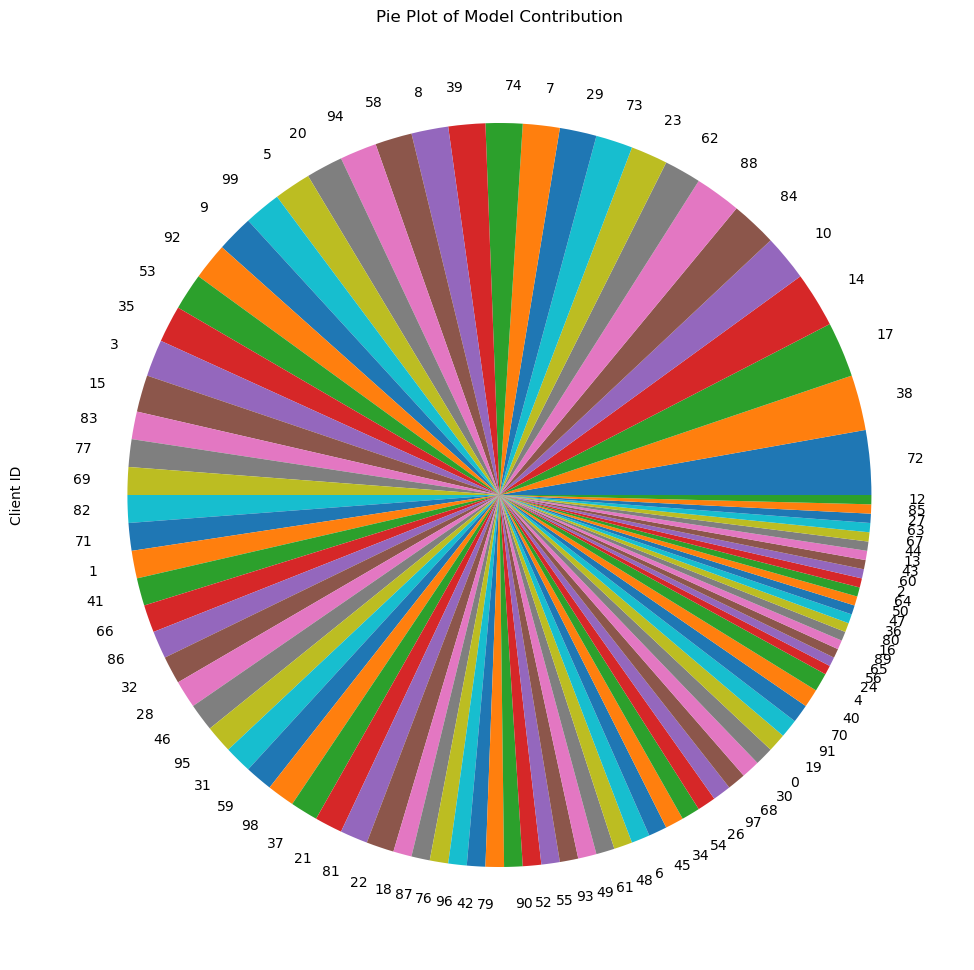

In [15]:
ids = evaluation_metrics["Client ID"].value_counts()
ids.plot.pie(figsize=(12, 14), title="Pie Plot of Model Contribution", sort_columns=True)

In [16]:
for client in clients:
    print(clients[client])

[0.87, 0.89, 0.88, 0.87, 0.92, 0.89, 0.91]
[0.78, 0.77, 0.78, 0.77, 0.77, 0.76]
[0.82, 0.82, 0.83, 0.84, 0.84, 0.84]
[0.84, 0.82, 0.84, 0.84, 0.85, 0.85]
[0.86, 0.89, 0.89, 0.88, 0.89]
[0.92, 0.92, 0.93, 0.92, 0.94]
[1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Local Model Utility against time in training')

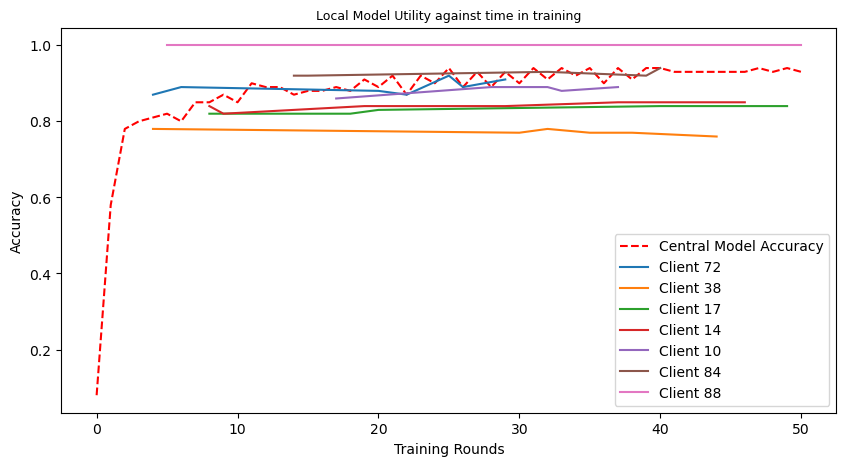

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.plot(server_metrics, "r--", label="Central Model Accuracy")
for c in clients_r.keys():
    ax.plot(clients_r[c][0], clients_r[c][1], label='Client {}'.format(str(c)))
ax.set_ylabel("Accuracy")
ax.set_xlabel('Training Rounds')
ax.legend()
ax.set_title("Local Model Utility against time in training", fontsize=9)